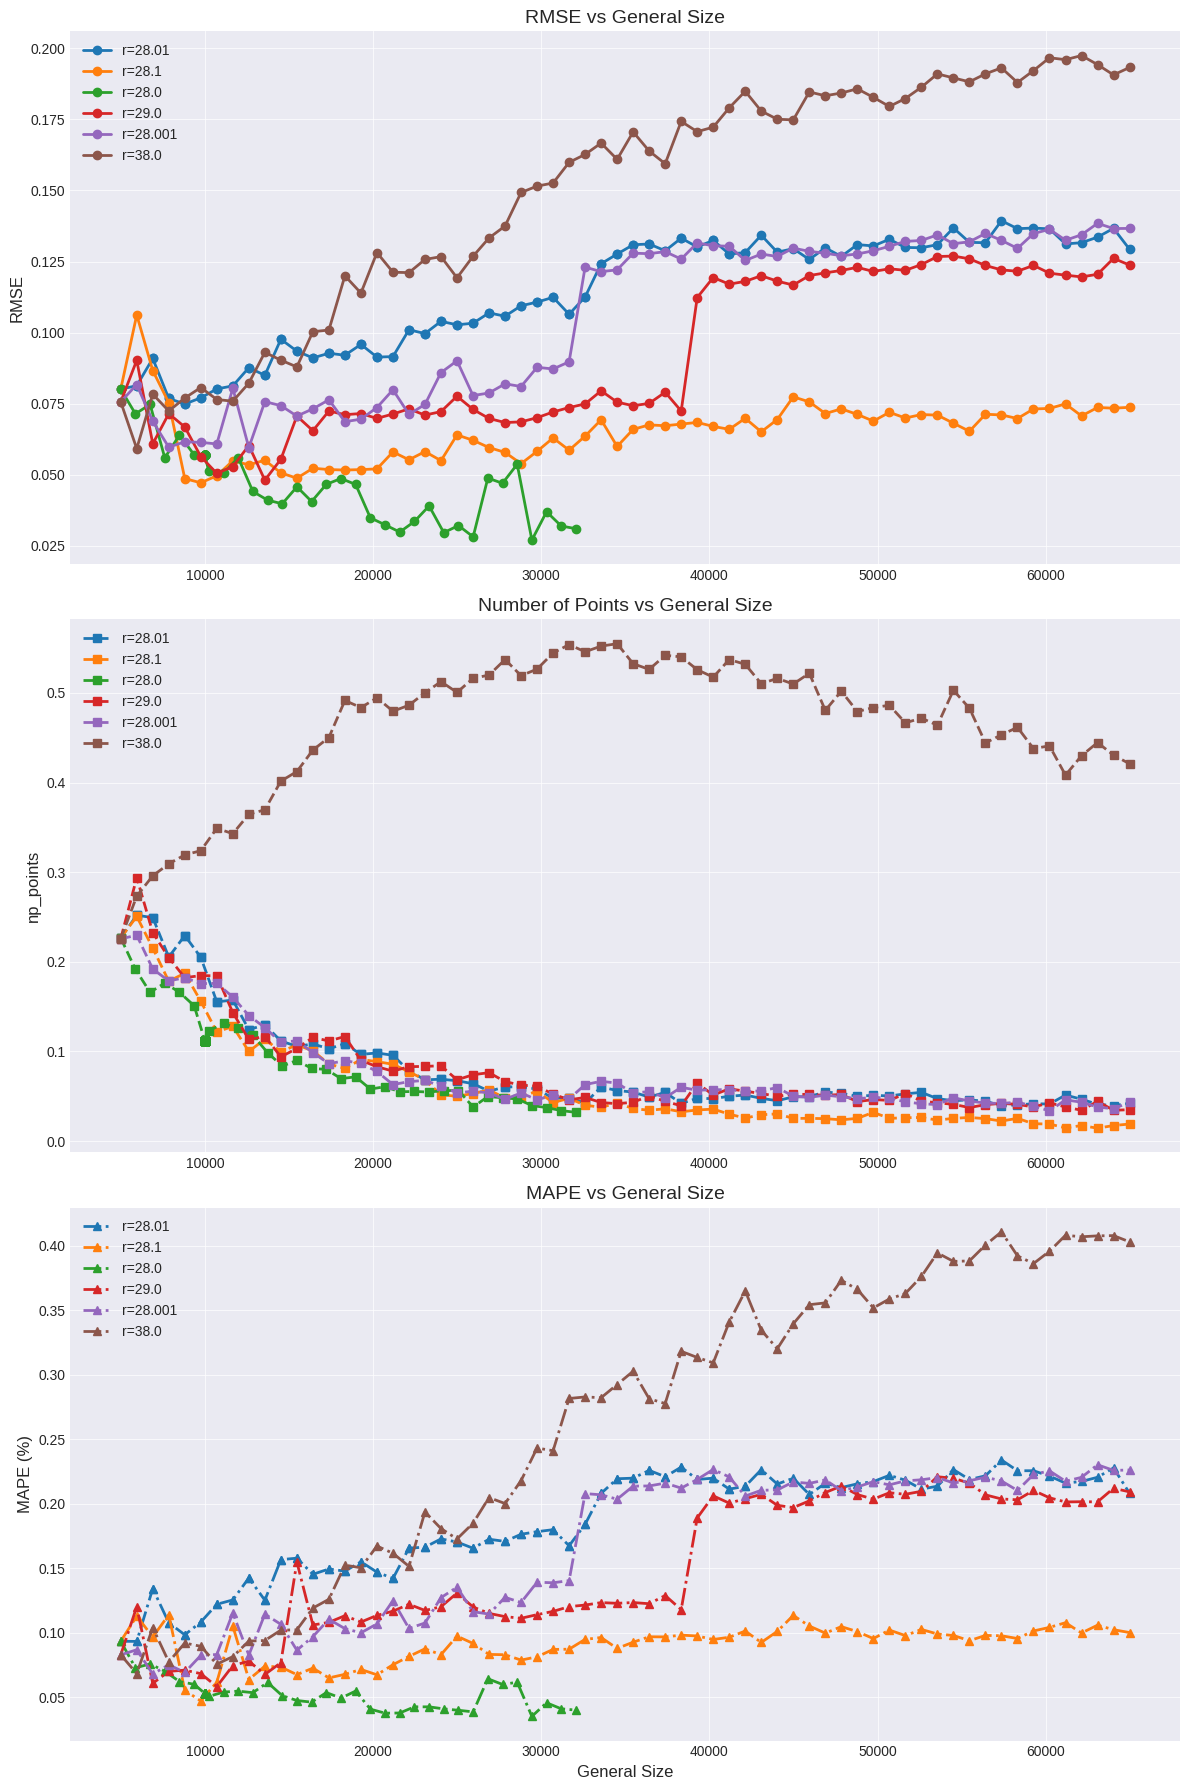

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_csv(
    'size_experiment_final.txt',
    header=None,
    names=[
        'deviation',
        'arg',
        'prediction_size',
        'rmses',
        'np_points',
        'mape',
        'general_size'
    ]
)

# Уникальные значения отклонений
deviations = df['deviation'].unique()

# Создание фигуры с тремя субграфиками
plt.figure(figsize=(12, 18))
plt.style.use('seaborn-v0_8-darkgrid')

# График для RMSE
plt.subplot(3, 1, 1)
for d in deviations:
    subset = df[df['deviation'] == d]
    # Сортировка по general_size
    subset = subset.sort_values('general_size')
    plt.plot(
        subset['general_size'],
        subset['rmses'],
        'o-',
        linewidth=2,
        markersize=6,
        label=f'r={d+28}'
    )
plt.title('RMSE vs General Size', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()

# График для np_points
plt.subplot(3, 1, 2)
for d in deviations:
    subset = df[df['deviation'] == d]
    # Сортировка по general_size
    subset = subset.sort_values('general_size')
    plt.plot(
        subset['general_size'],
        subset['np_points'],
        's--',
        linewidth=2,
        markersize=6,
        label=f'r={d+28}'
    )
plt.title('Number of Points vs General Size', fontsize=14)
plt.ylabel('np_points', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()

# График для MAPE
plt.subplot(3, 1, 3)
for d in deviations:
    subset = df[df['deviation'] == d]
    # Сортировка по general_size
    subset = subset.sort_values('general_size')
    plt.plot(
        subset['general_size'],
        subset['mape'],
        '^-.',
        linewidth=2,
        markersize=6,
        label=f'r={d+28}'
    )
plt.title('MAPE vs General Size', fontsize=14)
plt.xlabel('General Size', fontsize=12)
plt.ylabel('MAPE (%)', fontsize=12)
plt.grid(True, alpha=0.7)
plt.legend()

plt.tight_layout()
plt.savefig('sorted_metrics_vs_general_size.png', dpi=300)
plt.show()